In [7]:
import urllib.request
import pandas as pd
import numpy as np
from scipy import stats

#plot stuff
import matplotlib.pyplot as plt
import matplotlib as mpl

def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (7,2.5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

In [25]:
df = pd.read_csv("df_sum_score.csv")

In [29]:
df_temp = df.HI_GRADE_AVG.sort_values(ascending=False, inplace=False, kind='quicksort')
df_top_100 = df_temp.head(100)
# df_top_100[""]
for index in df_top_100.index:
    df_top_100["Col_avg_scores"] = df_temp.

# df_top_100.index
# df_top_100.index

Int64Index([ 5129, 11864,  4874,  7340,  1089,  4835,  5673,  5872,  4900,
            12328,  2607, 12003,  1799,  8877, 10098,  4373,  2308,  8982,
             2325,  6236, 10096, 11800,  4333,  6641, 11716,  6991, 11986,
            10892,  6880,  8905,  8492,  6927, 10846, 10992, 11714,  5591,
             9961, 12018,  7342,  5576,  2068,   622,  7354,  7789,  5376,
            12016,  5027, 11756,  7333,  5238,  5199,  4435,  5248,  7490,
             9099,  6773,  7201,  7493,  7126,  2111,  5596,  7332,  7352,
            12028,  8893,  2697,  2780, 12204,  1925, 11260,  4483, 11651,
             5323, 11792,  9705, 11871,  8766,  4514, 11544,  6070,  9480,
             7485,  4799,  1099, 11861,  7510, 10137, 12112,  1962,  4293,
            11604,  6862,  2137, 12063, 11214,  8352,  6269,  8041,  6145,
            11095],
           dtype='int64')

In [34]:
type(df_top_100)

pandas.core.series.Series

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


def Ridgeline_dists(df,x, metric="",plot_label=""):

    df_temp = df.copy()
    # df_temp = df_temp.loc[df_temp["GENDER"] == GENDER]
#     df_temp.email = df_temp.email.str.split("@").str[0]

    x = x #df_temp.TOTAL_SCORE_S11
    g = df_temp.GENDER
    df_kat = pd.DataFrame(dict(x=x, g=g))

    # The order of the emails in relation to their email
    # df_kat_order = df_kat.groupby(["g"]).mean()
    df_kat_order = df_kat.groupby(["g"]).count()

    df_kat_order = df_kat_order.sort_values(by="x", ascending=False)

    # email = df_kat_order.index
    # email = email.to_frame(index=False)

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
    g = sns.FacetGrid(
        df_kat,
        row="g",
        hue="g",
        # hue_order=email.g,
        aspect=15,
        height=0.5,
        palette=pal,
        # row_order=email.g,
    )

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes,
        )

    g.map(label, "x")

    g.set_xlabels(plot_label)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)


C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate 

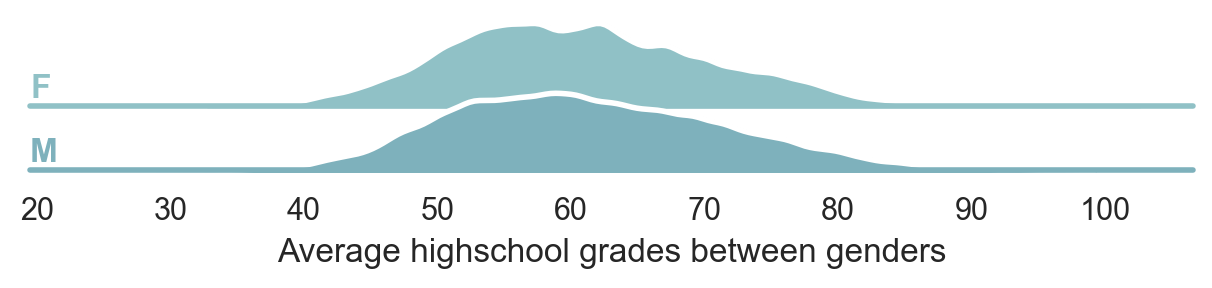

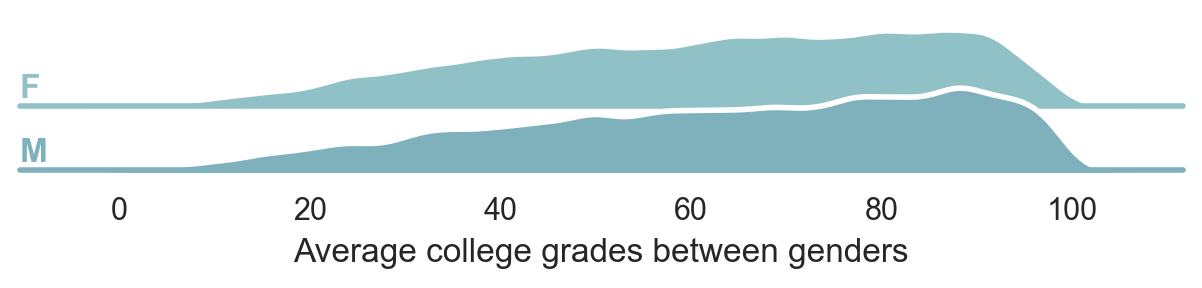

In [9]:
Ridgeline_dists(df,x=df.HI_GRADE_AVG,plot_label='Average highschool grades between genders')
Ridgeline_dists(df,x=df.COL_GRADE_AVG,plot_label='Average college grades between genders')

# Ridgeline_dists(df,x=df.TOTAL_SCORE_S11)

In [37]:
max(df.HI_GRADE_AVG)

100.0

# Histograms

Text(0.5, 0, 'nn')

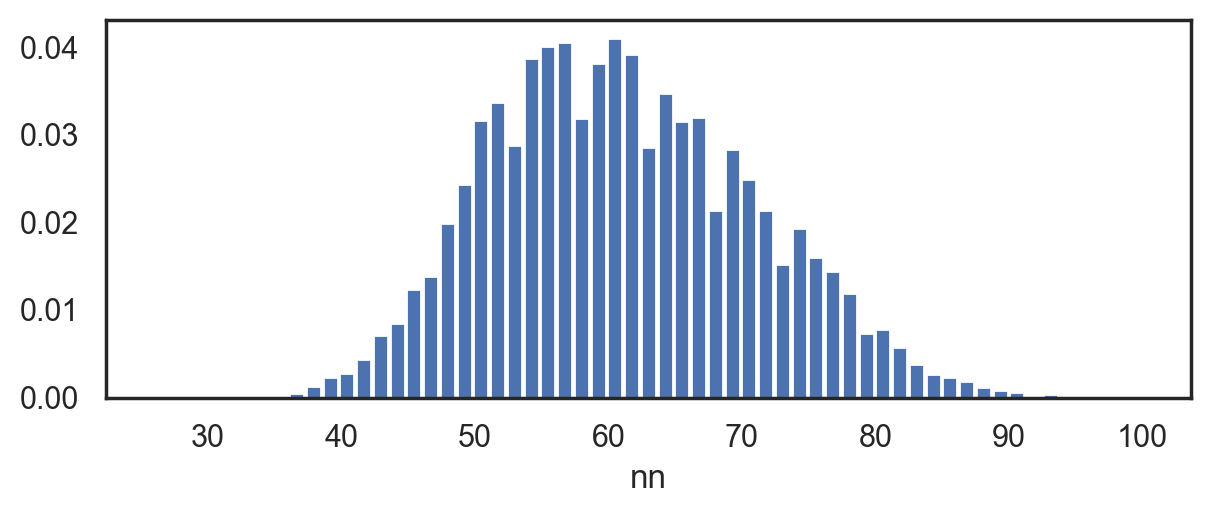

In [132]:
bins = np.linspace(min(df.HI_GRADE_AVG),max(df.HI_GRADE_AVG), 60)
hist, edges = np.histogram(df.HI_GRADE_AVG, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]
fig,ax = plt.subplots()
ax.bar(x,hist,width=width*0.9)
ax.set_xlabel('nn')
# Det er måske en idé at lave to forskellige regressionslinjer her. En for kvinderne og en for mændene. 

Text(0, 0.5, 'Probability density')

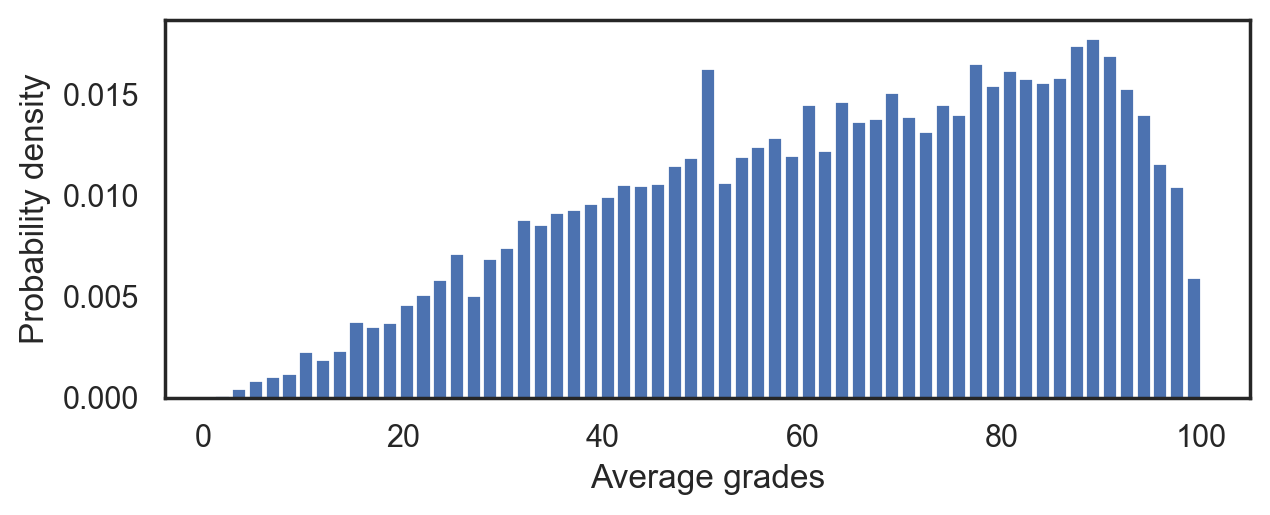

In [131]:
bins = np.linspace(min(df.COL_GRADE_AVG),max(df.COL_GRADE_AVG), 60)
hist, edges = np.histogram(df.COL_GRADE_AVG, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]

fig,ax = plt.subplots()
ax.bar(x,hist,width=width*0.9)
ax.set_xlabel('Average grades')
ax.set_ylabel('Probability density')

In [117]:
 # Draw the densities in a few steps
g.map(ax.bar(x,men_means,width=width*0.9), "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(ax.bar(x,women_means,width=width*0.9), "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

        # Define and use a simple function to label the plot in axes coordinates


g.map(label, "x")

g.set_xlabels(plot_label)

        # Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.25)

        # Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

NameError: name 'g' is not defined

ValueError: shape mismatch: objects cannot be broadcast to a single shape

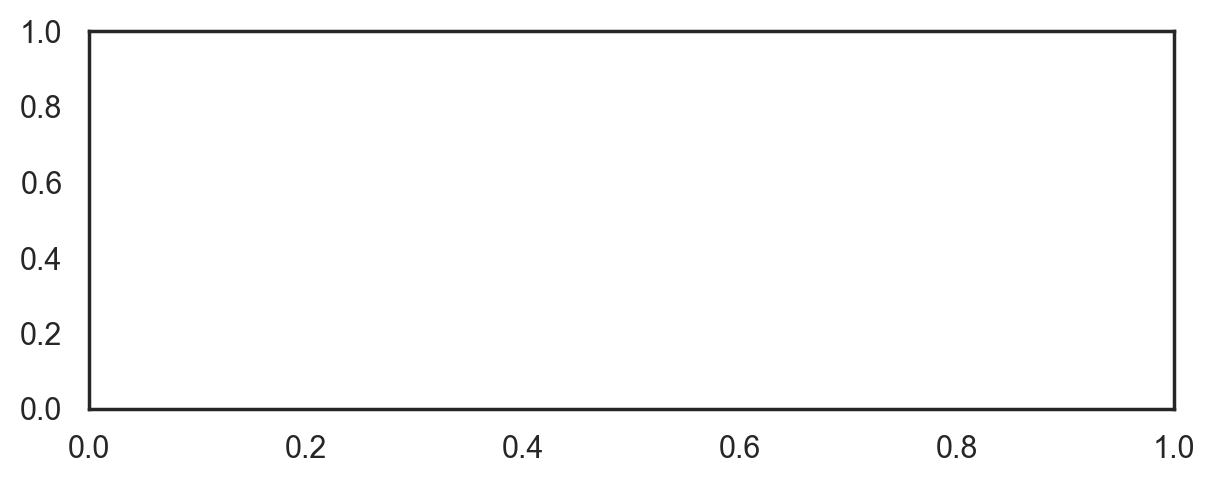

In [114]:
# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = df[df.GENDER=='M'][['GENDER','HI_GRADE_AVG']]
men_means = np.array(men_means['HI_GRADE_AVG'].T.to_list())
women_means = df[df.GENDER=='F'][['GENDER','HI_GRADE_AVG']]
women_means = np.array(women_means['HI_GRADE_AVG'].T.to_list())


 
bins = np.linspace(min(df.COL_GRADE_AVG),max(df.COL_GRADE_AVG), 100)
hist, edges = np.histogram(df.COL_GRADE_AVG, bins=bins)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]

# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x,men_means, width=width*0.9, label='Men')
rects2 = ax.bar(x, women_means, width=width*0.9, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [112]:
from numpy import array
# men_means = men_means['HI_GRADE_AVG'].to_list()



men_means['HI_GRADE_AVG'].to_list()
women_means = df[df.GENDER=='F'][['GENDER','HI_GRADE_AVG']]
women_means['HI_GRADE_AVG'].to_list()

men_means = np.array(men_means['HI_GRADE_AVG'].T.to_list())
men_means


array([43.        , 77.66666667, 73.66666667, ..., 57.        ,
       67.33333333, 66.66666667])

In [136]:
men = df[df.GENDER=='M'][['GENDER','HI_GRADE_AVG']]
bins = np.linspace(min(men.HI_GRADE_AVG),max(men.HI_GRADE_AVG), 60)



Text(0.5, 0, 'men')

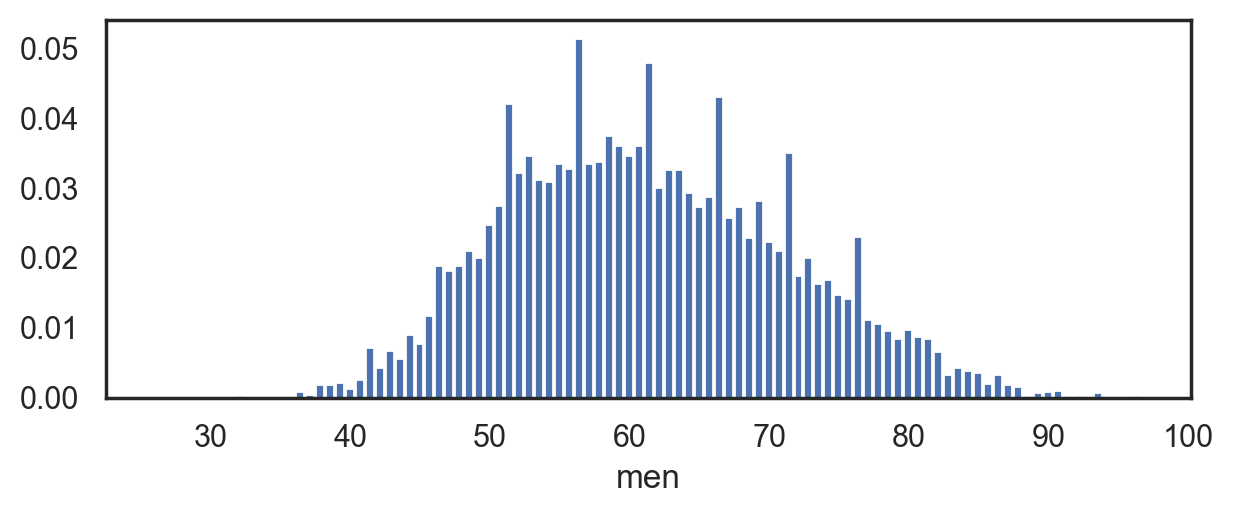

In [141]:
men = df[df.GENDER=='M'][['GENDER','HI_GRADE_AVG']]
bins = np.linspace(min(men.HI_GRADE_AVG),max(men.HI_GRADE_AVG), 100)

histmen, edges = np.histogram(men.HI_GRADE_AVG, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]
fig,ax = plt.subplots()
ax.bar(x,histmen,width=width*0.9)
ax.set_xlabel('men')


Text(0.5, 0, 'women')

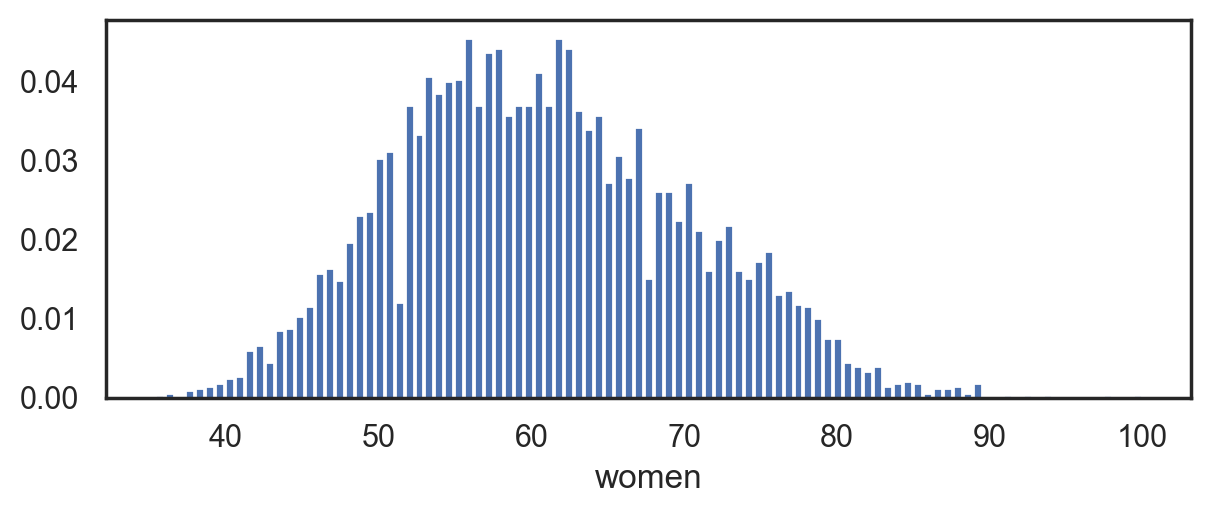

In [142]:
women = df[df.GENDER=='F'][['GENDER','HI_GRADE_AVG']]
bins = np.linspace(min(women.HI_GRADE_AVG),max(women.HI_GRADE_AVG), 100)

histwomen, edges = np.histogram(women.HI_GRADE_AVG, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]
fig,ax = plt.subplots()
ax.bar(x,histwomen,width=width*0.9)
ax.set_xlabel('women')

ValueError: x and y must have same first dimension, but have shapes (100,) and (99,)

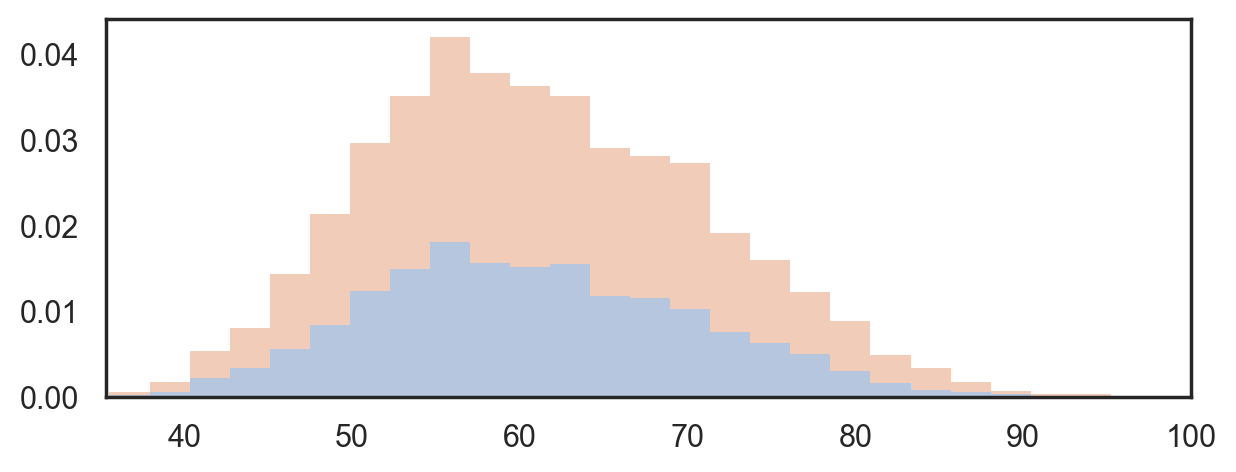

In [147]:


y1=np.array(women.HI_GRADE_AVG)
y2=np.array(men.HI_GRADE_AVG)

# add histogram showing individual components
plt.hist([y1, y2], 31, histtype='barstacked', density=True, alpha=0.4, edgecolor='none')

# get X limits and fix them
# mn, mx = plt.xlim()
plt.xlim( min(women.HI_GRADE_AVG),max(women.HI_GRADE_AVG))

# add our distributions to figure
x = bins
plt.plot(x, histwomen, color='C0', ls='--', label='d1')
plt.plot(x, histmen, color='C1', ls='--', label='d2')

# estimate Kernel Density and plot
kde = sps.gaussian_kde(ys)
plt.plot(x, kde.pdf(x), label='KDE')

# finish up
plt.legend()
plt.ylabel('Probability density')
sns.despine()




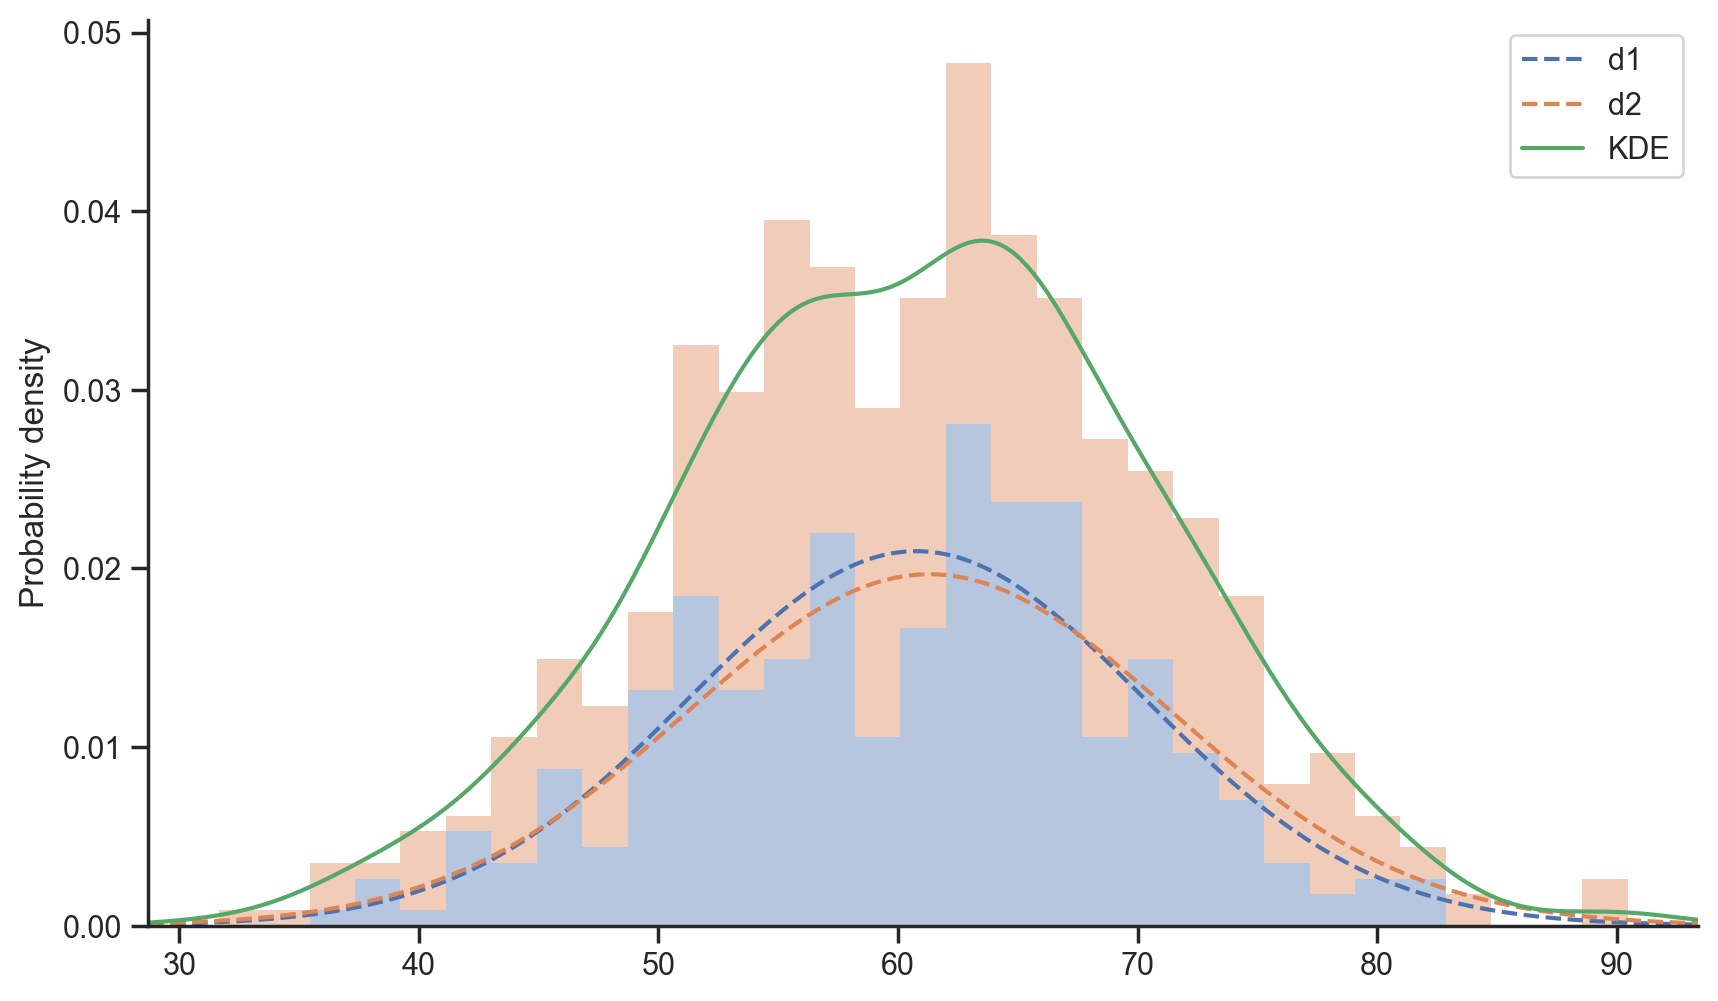

In [154]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='ticks')

# parameterise our distributions
# d1 = sps.norm(0, 10)
d1 = sps.norm(women.HI_GRADE_AVG.mean(),women.HI_GRADE_AVG.std())
d2 = sps.norm(men.HI_GRADE_AVG.mean(),men.HI_GRADE_AVG.std())

# sample values from above distributions
y1 = d1.rvs(300)
y2 = d2.rvs(300)
# combine mixture
ys = np.concatenate([y1, y2])

# create new figure with size given explicitly
plt.figure(figsize=(10, 6))

# add histogram showing individual components
plt.hist([y1, y2], 31, histtype='barstacked', density=True, alpha=0.4, edgecolor='none')

# get X limits and fix them
mn, mx = plt.xlim()
plt.xlim(mn, mx)

# add our distributions to figure
x = np.linspace(mn, mx, 301)
plt.plot(x, d1.pdf(x) * (len(y1) / len(ys)), color='C0', ls='--', label='d1')
plt.plot(x, d2.pdf(x) * (len(y2) / len(ys)), color='C1', ls='--', label='d2')

# estimate Kernel Density and plot
kde = sps.gaussian_kde(ys)
plt.plot(x, kde.pdf(x), label='KDE')

# finish up
plt.legend()
plt.ylabel('Probability density')
sns.despine()

In [153]:
d1 = sps.norm(women.HI_GRADE_AVG.mean(),women.HI_GRADE_AVG.std())
d1

In [76]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='ticks')

# parameterise our distributions
men = sps.norm(0, 10)
women = sps.norm(60, 15)

# sample values from above distributions
y1 = d1.rvs(300)
y2 = d2.rvs(200)
# combine mixture
ys = np.concatenate([y1, y2])

# create new figure with size given explicitly
plt.figure(figsize=(10, 6))

# add histogram showing individual components
plt.hist([y1, y2], 31, histtype='barstacked', density=True, alpha=0.4, edgecolor='none')

# get X limits and fix them
mn, mx = plt.xlim()
plt.xlim(mn, mx)

# add our distributions to figure
x = np.linspace(mn, mx, 301)
plt.plot(x, d1.pdf(x) * (len(y1) / len(ys)), color='C0', ls='--', label='d1')
plt.plot(x, d2.pdf(x) * (len(y2) / len(ys)), color='C1', ls='--', label='d2')

# estimate Kernel Density and plot
kde = sps.gaussian_kde(ys)
plt.plot(x, kde.pdf(x), label='KDE')

# finish up
plt.legend()
plt.ylabel('Probability density')
sns.despine()

In [72]:
men_means.

AttributeError: 'DataFrame' object has no attribute 'M'